# Fast Food Marketing A/B Test

Evaluate A/B testing results and decide which marketing strategy works the best.

## About the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./dataset/WA_Marketing-Campaign.csv')
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [3]:
df.describe(include='all')

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548,548.000000,548.000000,548.000000,548.000000,548.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Medium,NaN,NaN,NaN,NaN,NaN
freq,NaN,320,NaN,NaN,NaN,NaN,NaN
mean,5.715328,NaN,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,NaN,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,NaN,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,NaN,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,NaN,708.000000,12.000000,3.000000,3.250000,60.477500


Column explanation:
- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that were tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Data Distribution

<Axes: xlabel='SalesInThousands'>

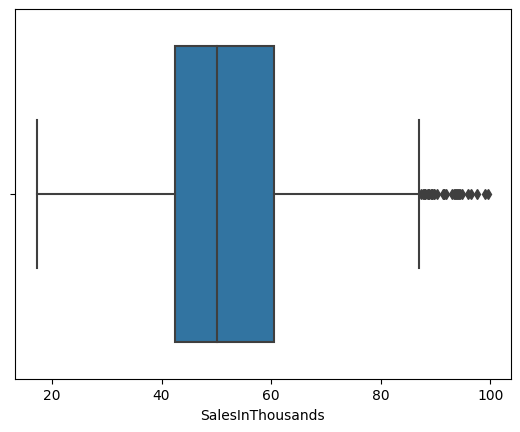

In [21]:
ax[i,j]

<Axes: >

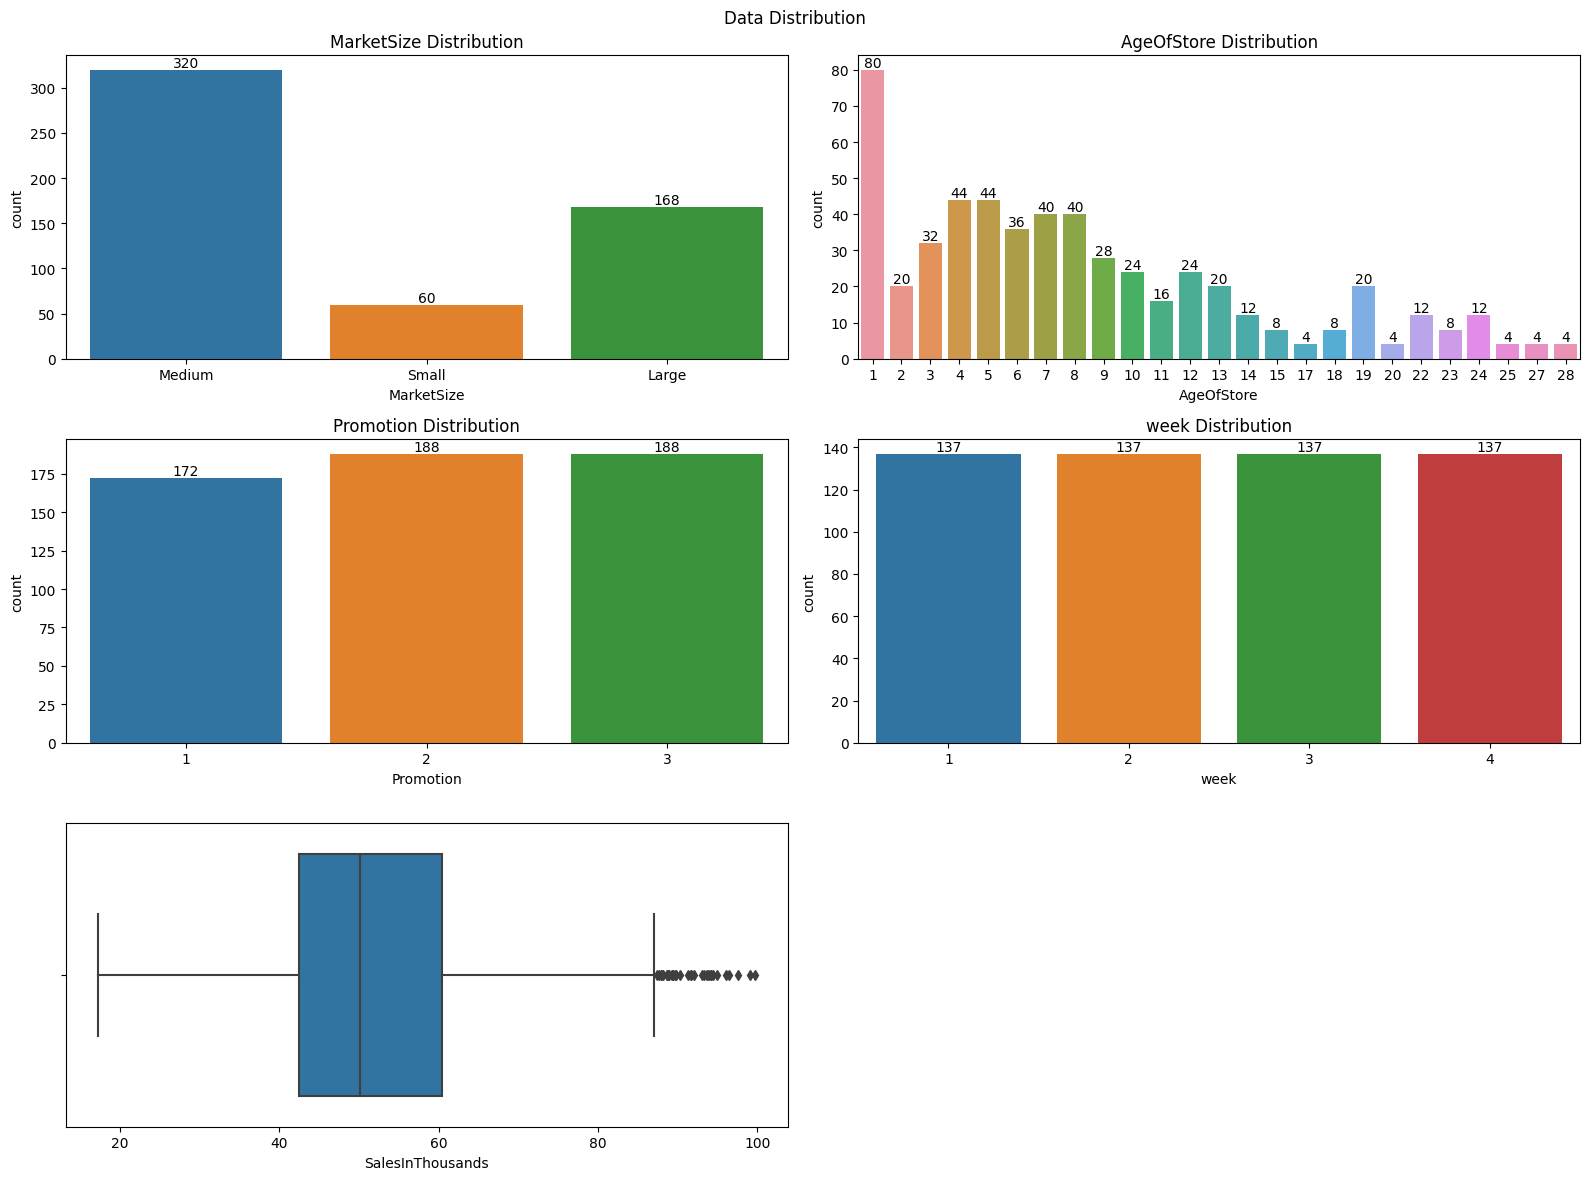

In [37]:
f, ax = plt.subplots(3,2, figsize=(16,12))
cols = ['MarketSize','AgeOfStore','Promotion','week']
c = 0
for i in range(len(ax)-1):
    j = 0
    while j<2:
        ax[i,j] = sns.countplot(df,x=cols[c], ax=ax[i,j])
        ax[i,j].bar_label(ax[i,j].containers[0])
        ax[i,j].set_title(cols[c]+' Distribution')
        j+=1
        c+=1

sns.boxplot(df,x='SalesInThousands', ax=ax[2,0])
ax[2,1].set_axis_off()
plt.suptitle('Data Distribution')
plt.tight_layout()
plt.show()

In [41]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

### Q1: How is the distribution of market and location in each promotion type?


<Axes: xlabel='Promotion'>

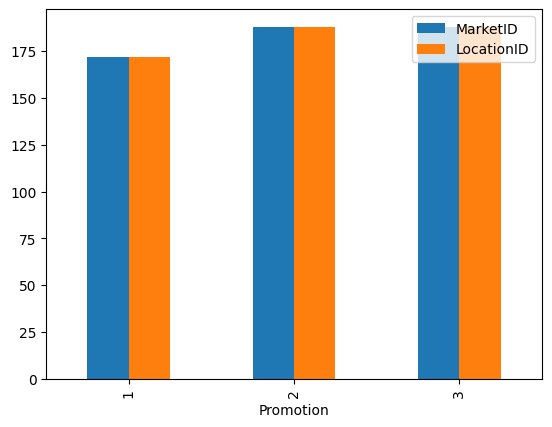

In [75]:
tmp = df.groupby(['Promotion']).agg({'MarketID':'count','LocationID':'count'})
tmp.plot(kind='bar')

Based on result above, market and location in each promotion is distributed equaly

In [76]:
tmp

,MarketID,LocationID
Promotion,,
1,172,172
2,188,188
3,188,188


### Q2: How is the revenue each test group in each week?

In [92]:
df.groupby(['Promotion'])['SalesInThousands'].agg(['mean','median','std'])

,mean,median,std
Promotion,,,
1,58.099012,55.385,16.553782
2,47.329415,45.385,15.108955
3,55.364468,51.165,16.766231


As we can see above, each promotion have different result in revenue with Promotion 1 getting the highest avg and median of revenue. We will talk more about this later

### Q3: How is the revenue by test group in each week?

In [125]:
tmp = df.groupby(['week','Promotion'], as_index=False)['SalesInThousands'].agg(['sum']).reset_index(level=1)
tmp

,Promotion,sum
week,,
1,1,2504.51
1,2,2243.32
1,3,2621.48
2,1,2447.97
2,2,2236.38
2,3,2629.61
3,1,2527.32
3,2,2242.94
3,3,2555.76


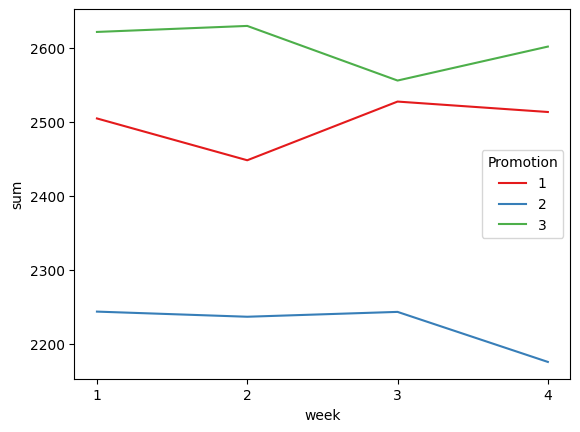

In [138]:
ax = sns.lineplot(tmp,x=tmp.index ,y='sum' ,hue='Promotion', errorbar=None, palette='Set1')
ax.set_xticks([1,2,3,4])
plt.show()

Based on figure above, promotion 3 receive the highest revenue compared to other promotion method. While promotion 2 is the opposite.